# Analysis

### Setup

In [43]:
import json
import os
import sys
import pandas as pd
import numpy as np
import mdtraj as md
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sys.path.append("/Users/frederikespersenknudsen/Local/OrthoIDP/src")
import analyse_data
import analyse_results

## Initial test runs

### CIDER parameters for input data

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [3]:
# Loading metadata
metadata_path = 'exp/initial/initial.json'
with open(metadata_path, 'r') as file:
    metadata = json.load(file)

# Calculating parameters
params = pd.concat([analyse_data.cider_parameters(cols['sequence'], name) for name, cols in metadata['data'].items()])

# Presenting documentation and results
params.sort_values(by='kappa')

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.
H1-0_WT,0.154432,0.432432,0.378378,3.249550,0.891892
H1-0_RAND,0.217323,0.432432,0.378378,3.249550,0.891892
H2B_RAND,0.299729,0.485714,0.371429,2.614286,0.942857
H2B_WT,0.308988,0.500000,0.333333,2.636111,0.916667
H2B_CLUST,0.965685,0.485714,0.371429,2.614286,0.942857
H1-0_CLUST,0.994959,0.432432,0.378378,3.249550,0.891892


### $R_g$-distribution of variants

In [2]:
metadata_path = 'exp/initial/initial.json'
results_dir = 'exp/initial/results'

In [4]:
# Loading data metadata for simulation analysis
with open(metadata_path, 'r') as file:
    data = json.load(file)['data']
data = pd.DataFrame(data).transpose()
data

,template,name,species,sequence,region,location,variant
H1-0_WT,H1-0,histone H1.0,Homo sapiens (human),TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,CTD,[83:194],Wild type
H1-0_RAND,H1-0,histone H1.0,Homo sapiens (human),VADSKKTSAKAKKKKAKPAKRKAPTGKKPSSTAKKKKAPKKKAKLK...,CTD,[83:194],Randomly shuffled
H1-0_CLUST,H1-0,histone H1.0,Homo sapiens (human),KKKRKKKKKKKKKKKKKKKKKRKKKKKKKKKKKKKKKKKKKKKKKA...,CTD,[83:194],Terminally clustered charges
H2B_WT,H2B,histone H2B type 2-E,Homo sapiens (human),MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRK,NTD,[0:35],Wild type
H2B_RAND,H2B,histone H2B type 2-E,Homo sapiens (human),PPKKRPKSAEVDSPKKSAMAKAKAKGKGTQKKKRR,NTD,[0:35],Randomly shuffled
H2B_CLUST,H2B,histone H2B type 2-E,Homo sapiens (human),KRKRKKKKKKKKRKKAPAVTGAQAMPGASPSPSDE,NTD,[0:35],Terminally clustered charges


In [ ]:
# Loading trajectories
data['traj'] = data.apply(lambda row: md.load_dcd(*['/'.join([results_dir, row.name, filename]) for filename  in ['traj.dcd', 'top.pdb']]), axis=1)

# Calculating simulation specs
data['time'] = data.apply(lambda row: row['traj'].time[-1]*1e-6, axis=1)

# Calculating Rg
data['Rg'] = data.apply(lambda row: analyse_results.calculate_rg(row['sequence'], row['traj']), axis=1)

MEAN VALUES OF Rg
template  variant                     
H1-0      Randomly shuffled               0.009382
          Terminally clustered charges    0.006808
          Wild type                       0.009554
H2B       Randomly shuffled               0.004248
          Terminally clustered charges    0.003132
          Wild type                       0.004274
Name: Rg, dtype: float64


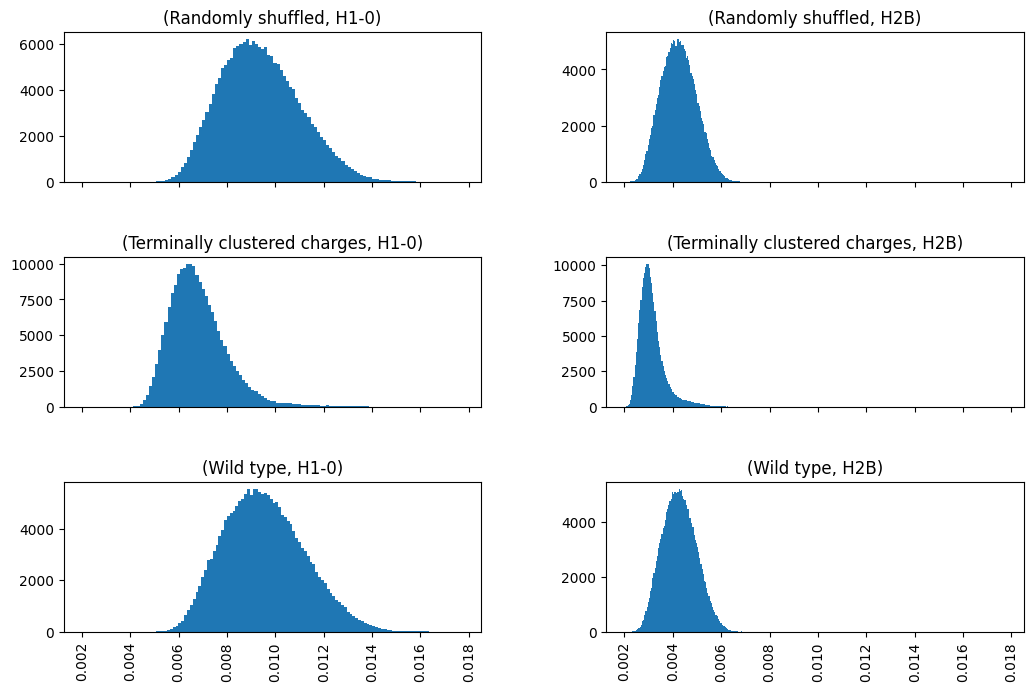

In [6]:
# Plotting Rg distributions
data = data.explode('Rg')
data['Rg'] = data['Rg'].astype(float)

# Plotting distributions
data.hist(column='Rg', by=['variant', 'template'], layout=(3,2), sharex=True, figsize=(12,8), bins=100)

# Calculating means
print("MEAN VALUES OF Rg")
print(data.groupby(by=['template', 'variant'])['Rg'].mean())

## Histone H1.0 Orthologs

### CIDER parameters for input data

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [3]:
# Loading metadata
metadata_path = 'exp/ortho/ortho.json'
with open(metadata_path, 'r') as file:
    metadata = json.load(file)

# Calculating parameters
params = pd.concat([analyse_data.cider_parameters(cols['sequence'], name) for name, cols in metadata['data'].items()])
metadata = metadata.join(params)

# Presenting documentation and results
params.sort_values(by='kappa')

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.
9COLU,0.087211,0.505618,0.505618,2.582022,0.966292
CHOAC,0.098363,0.516854,0.494382,2.635955,0.943820
STROC,0.102975,0.470000,0.450000,2.882000,0.930000
CEBIM,0.110991,0.463158,0.421053,3.103158,0.905263
RHIFE,0.120974,0.453608,0.391753,3.019588,0.917526
...,...,...,...,...,...
ARAGA,0.170307,0.453704,0.435185,2.890741,0.935185
AQUCH,0.178622,0.476190,0.438095,2.860000,0.942857
BOSMU,0.191155,0.400000,0.266667,3.100952,0.876190
OCTDE,0.226661,0.389610,0.311688,3.215584,0.844156


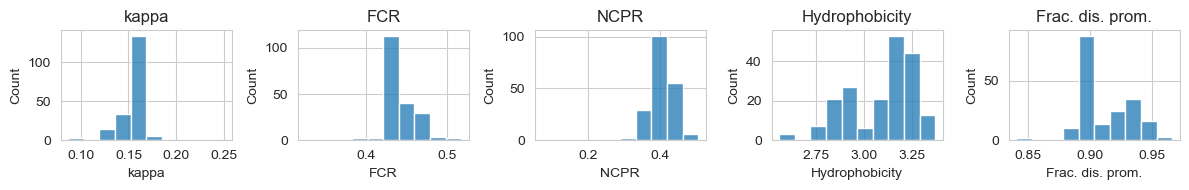

In [56]:
# Plotting CIDER parameters distribution
fig, axes = plt.subplots(ncols=len(param_cols), figsize=(12,2))

# Looping over subplots and parameters
for ax, col in zip(axes, param_cols):
    sns.histplot(data=metadata, x=col, bins=10, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Amino acid content for input data

In [2]:
# Loading metadata
metadata_path = 'exp/ortho/ortho.json'
with open(metadata_path, 'r') as file:
    metadata = json.load(file)
templates = pd.DataFrame(metadata['templates']).transpose()
data = pd.DataFrame(metadata['data']).transpose()
metadata = data.join(templates[['name', 'description', 'species']])

# Calculating frequencies
freqs = pd.concat([analyse_data.amino_acid_content(cols['sequence'], index) for index, cols in metadata.iterrows()])
metadata = metadata.join(freqs)

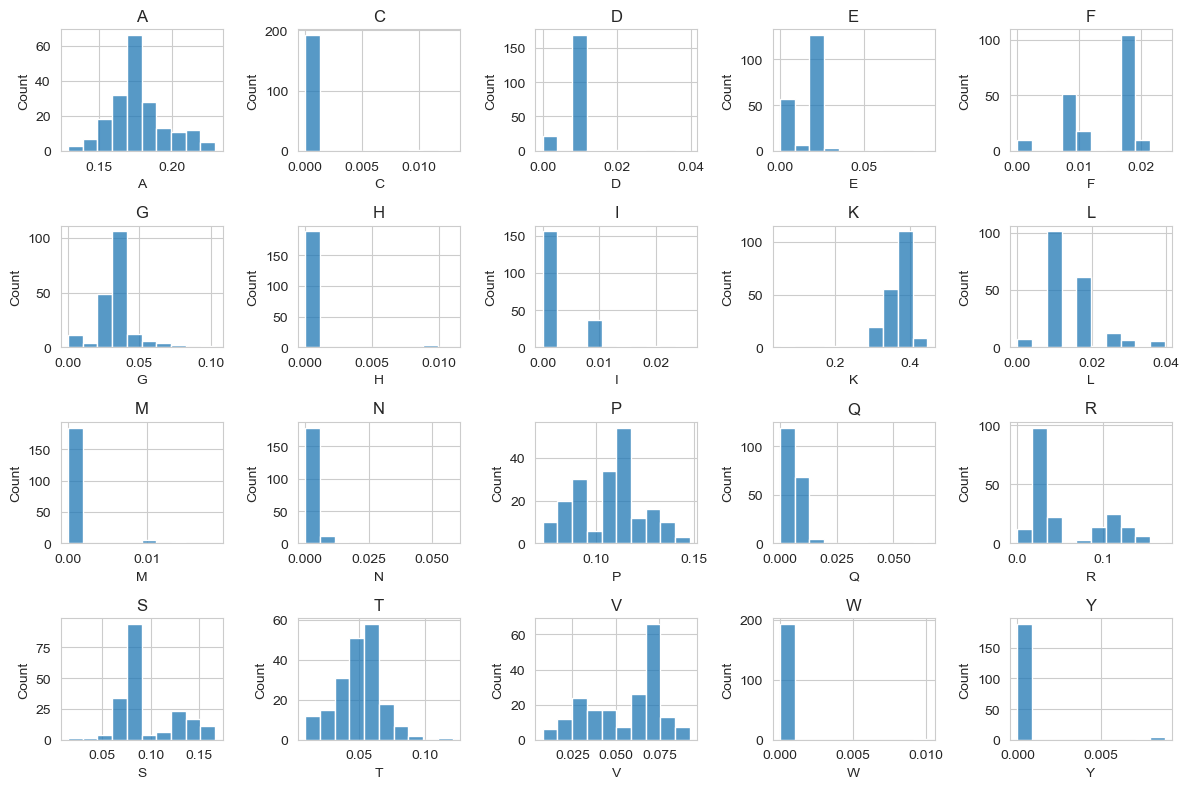

In [45]:
# Plotting distributions
# Setting plot dimensions
dimensions = (4,5)
fig, axes = plt.subplots(*dimensions, figsize=(12,8))
amino_acids = np.reshape(analyse_data.amino_acids, dimensions)

# Looping over subplots and amino acids
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        ax = axes[i,j]
        aa = amino_acids[i,j]
        sns.histplot(data=metadata, x=aa, bins=10, ax=ax)
        ax.set_title(aa)

plt.tight_layout()
plt.show()

### Principal component analysis

### Clustering

#### Fitting

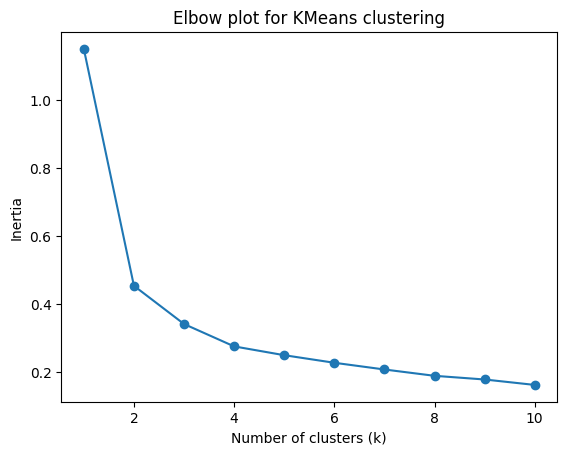

In [55]:
# Elbowplot for KMeans clustering
# Load the data
features = metadata[analyse_data.amino_acids]

# Initialising an empty list to store the inertia values for different k values
inertia = []

# Defining a range of k values to test
k_values = range(1, 11)

# Performing KMeans clustering for each k value and storing the inertia value
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow plot for KMeans clustering')
plt.show()

In [60]:
# Setting k-value
k = 2

In [61]:
# Assigning labels from clustering
# Load the data
features = metadata[analyse_data.amino_acids]

# Clustering
kmeans = KMeans(n_clusters=k, n_init=50)
kmeans.fit(features)

# Assigning labels
metadata['cluster'] = kmeans.predict(features)

# Showing cluster members
metadata.groupby('description')['cluster'].value_counts()

description                    cluster
H1 histone family member 0     1           1
H1 histone family, member 0    1           1
H1.0 linker histone            1          45
                               0           8
H10 protein                    1           2
H15 domain-containing protein  1          13
                               0           3
H5 protein                     0          43
Histone H1.0                   1          34
Histone H1.0-A                 1           1
Histone H1.0-B                 1           1
Histone H5                     0           7
                               1           1
histone H1.0                   1          29
histone H1.0-B-like            1           1
histone H1.0-like              1           4
histone H5                     0           1
Name: cluster, dtype: int64

#### Amino acid composition by cluster

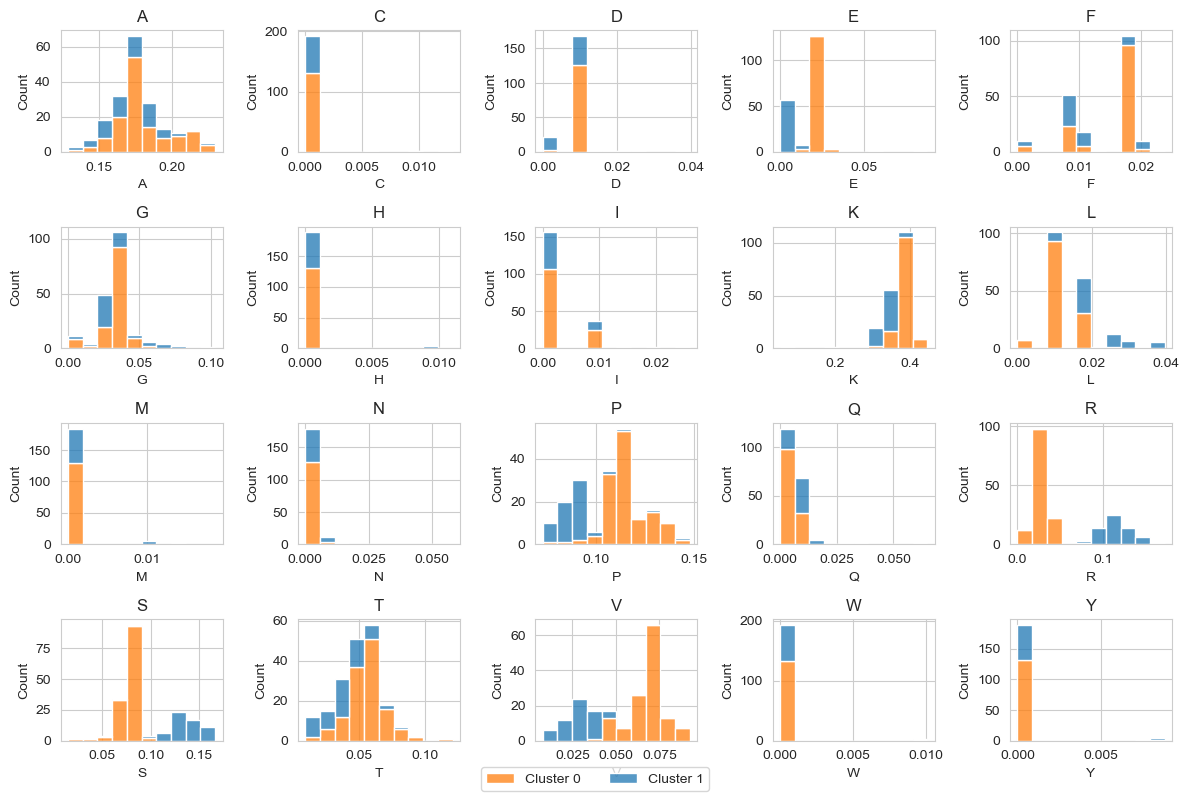

In [63]:
# Plotting amino acids distribution with clusterings
# Setting plot dimensions
dimensions = (4,5)
fig, axes = plt.subplots(*dimensions, figsize=(12,8))
amino_acids = np.reshape(analyse_data.amino_acids, dimensions)

# Looping over subplots and amino acids
for i in range(dimensions[0]):
    for j in range(dimensions[1]):
        ax = axes[i,j]
        aa = amino_acids[i,j]
        sns.histplot(data=metadata, x=aa, hue='cluster', bins=10, ax=ax, multiple='stack')
        ax.set_title(aa)
        ax.get_legend().remove() # remove legend from individual subplots
    
# Add a common legend outside the subplots
fig.legend([f'Cluster {ki}' for ki in range(k)], ncols=k, loc='lower center')

plt.tight_layout()
plt.show()

#### CIDER parameters by cluster

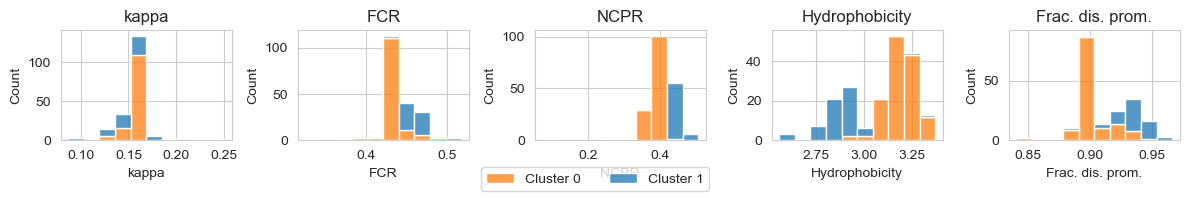

In [62]:
# Plotting CIDER parameters distribution with clusterings
# Joining parameters (previously calculated)
param_cols = params.columns

# Setting plot dimensions
fig, axes = plt.subplots(ncols=len(param_cols), figsize=(12,2))

# Looping over subplots and parameters
for ax, col in zip(axes, param_cols):
    sns.histplot(data=metadata, x=col, hue='cluster', bins=10, ax=ax, multiple='stack')
    ax.set_title(col)
    ax.get_legend().remove() # remove legend from individual subplots
    
# Add a common legend outside the subplots
fig.legend([f'Cluster {ki}' for ki in range(k)], ncols=k, loc='lower center')

plt.tight_layout()
plt.show()

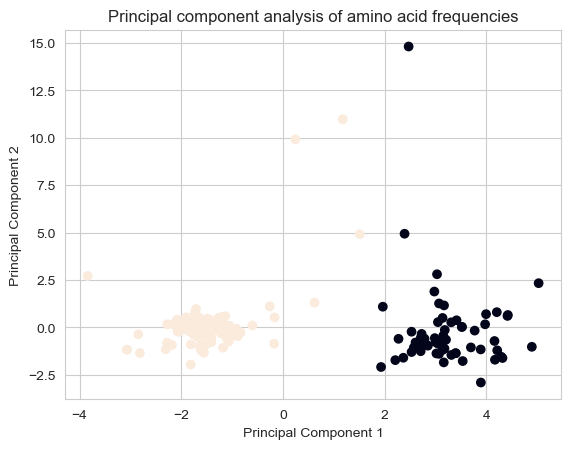

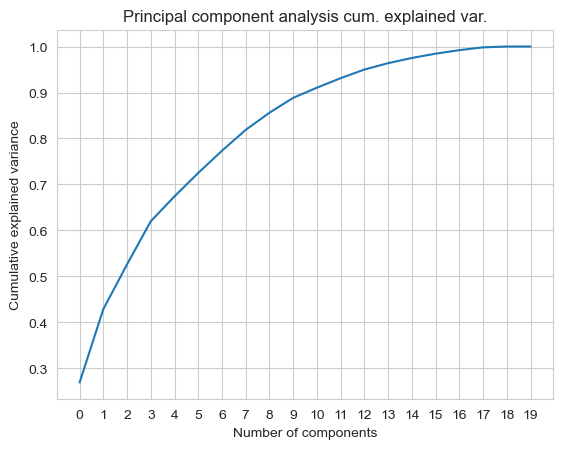

In [79]:
# Standardising data
features = metadata[analyse_data.amino_acids]
features = (features - features.mean()) / features.std()

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(features)

# Plot the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=metadata['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal component analysis of amino acid frequencies")
plt.show()

# Plot the cummulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_var)
plt.xticks(range(len(features.columns)))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Principal component analysis cum. explained var.')
plt.show()

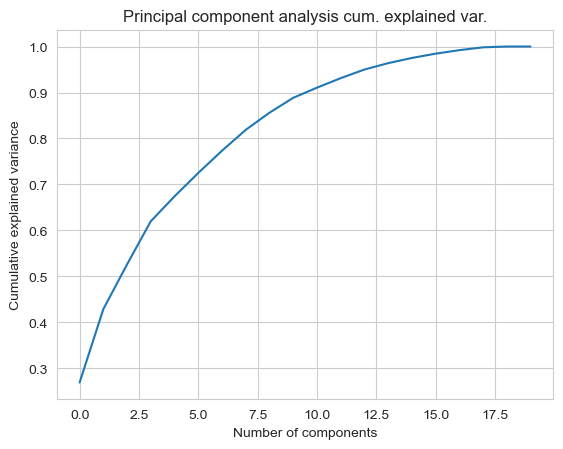

### Phylogenetic analysis

In [3]:
# Creating assembly of full-length sequences for analysis
with open("exp/ortho/ortho.json", 'r') as file:
    metadata = json.load(file)

ids = metadata['templates'].keys()
species = [metadata['templates'][id]['species'] for id in ids]
sequences = [metadata['templates'][id]['sequence'] for id in ids]

with open("exp/ortho/results/phylogeny/full_length.fasta", 'w') as file:
    for spec, seq in zip(species, sequences):
        file.write('>' + spec + '\n')
        file.write(seq + '\n')

In [4]:
# Creating assembly of IDR sequences for analysis
with open("exp/ortho/ortho.json", 'r') as file:
    metadata = json.load(file)

ids = metadata['data'].keys()
species = [metadata['templates'][id]['species'] for id in ids]
sequences = [metadata['data'][id]['sequence'] for id in ids]

with open("exp/ortho/results/phylogeny/idr.fasta", 'w') as file:
    for spec, seq in zip(species, sequences):
        file.write('>' + spec + '\n')
        file.write(seq + '\n')